# Day 22

https://adventofcode.com/2022/day/22

## Part 1

In [1]:
import numpy as np

def instr2moves(instr):
    moves = []
    v = ""
    for i in instr:
        if i.isdigit():
            v+=i
        if i=="R" or i=="L":
            moves.append(int(v))
            moves.append(i)
            v=""
    if v!="":
        moves.append(int(v))
    return moves

def parse22(filename):
    with open(filename) as f:
        data = f.read().split("\n\n")
        values = data[0].split("\n")
        xmax = max([ len(v) for v in values ])
        ymax = len(values)
        grid = np.zeros((ymax,xmax),dtype=int)-1
        r = 0
        for vv in values:
            c = 0
            for v in vv:
                if v==".":
                    grid[r][c] = 0
                elif v=="#":
                    grid[r][c] = 2
                c+=1
            r+=1
        instructions = data[1].strip("\n")
        return grid,instr2moves(instructions)

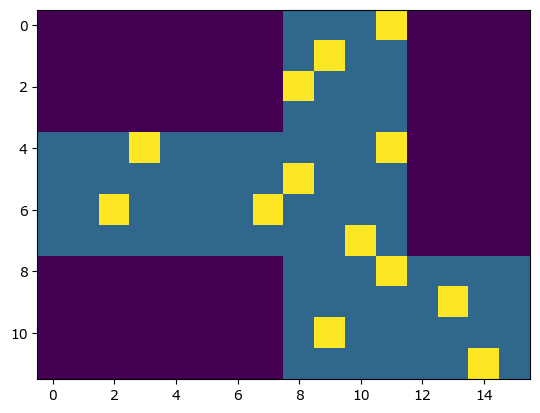

In [2]:
import matplotlib.pyplot as plt

grid, moves = parse22("examples/example22.txt")

plt.imshow(grid)
#_ = plt.axis('off')

In [3]:
def start(grid):
    x = 0
    for p in grid[0]:
        if p==0:
            break
        x+=1
    return (x,0)

# Facing is 0 for right (>), 1 for down (v), 2 for left (<), and 3 for up (^)
movs = [(+1,0), # right
        (0,+1), # down
        (-1,0), # left
        (0,-1)] # up 

RIGHT = 0
DOWN = 1
LEFT = 2
UP = 3

PATH = 1
WALL = 2
WRAP = -1

def part1(grid,moves,verbose=False,markGrid=False):
    
    xmax = grid.shape[1]
    ymax = grid.shape[0]
    imov = 0

    P = start(grid)
    
    if markGrid:
        xp,yp = P
        grid[yp][xp] = PATH

    if verbose: print("Starting from",P)
        
    for m in moves:
        if type(m)==int:
            if verbose: print("Move {} in dir {}".format(m,movs[imov]))
            Pnew = P
            advance = True
            for _ in range(m):
                Pnew = ((P[0]+movs[imov][0])%xmax,(P[1]+movs[imov][1])%ymax) 
                xn,yn = Pnew
                if grid[yn][xn]==WALL: # wall, stop moving
                    if verbose: print("Wall in {}".format(Pnew))
                    break
                elif grid[yn][xn]==WRAP: # empty, wrap around
                    if verbose: print("Wrapping to the other side...")
                    Pold = P
                    while True:
                        Pnew = ((P[0]+movs[imov][0])%xmax,(P[1]+movs[imov][1])%ymax) 
                        if verbose: print("...",Pnew)
                        xn,yn = Pnew
                        if grid[yn][xn]==WALL: # wall, stop moving
                            if verbose: print("Wall in {}, back to {}".format(Pnew,Pold))
                            P = Pold
                            advance = False
                            break
                        if grid[yn][xn]!=WRAP:
                            break
                        P = Pnew
                if advance:
                    P = Pnew
                else:
                    break
                
                if verbose: print(P)
                if markGrid: grid[yn][xn]=PATH
        else:
            if verbose: print("Turn",m)
            if m=="L":
                imov = (imov-1)%4
            elif m=="R":
                imov = (imov+1)%4
                
    r = P[1]+1 # row
    c = P[0]+1 # column
    f = imov # facing
    # sum of 1000 times the row, 4 times the column, and the facing.
    password = 1000*r+4*c+f
    return password

Test 1: 6032


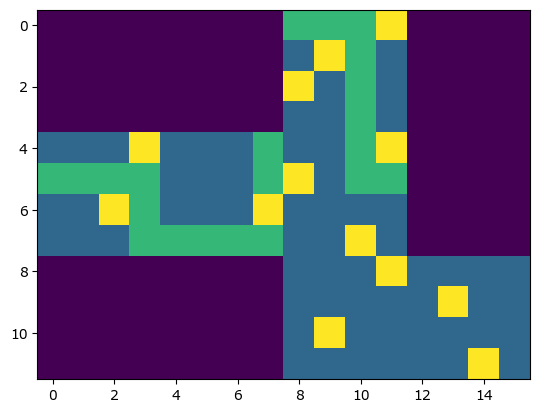

In [4]:
grid0, moves0 = parse22("examples/example22.txt")

test1 = part1(grid0,moves0,verbose=False,markGrid=True)
print("Test 1:",test1)

plt.imshow(grid0)
#_ = plt.axis('off')

Part 1: 27492


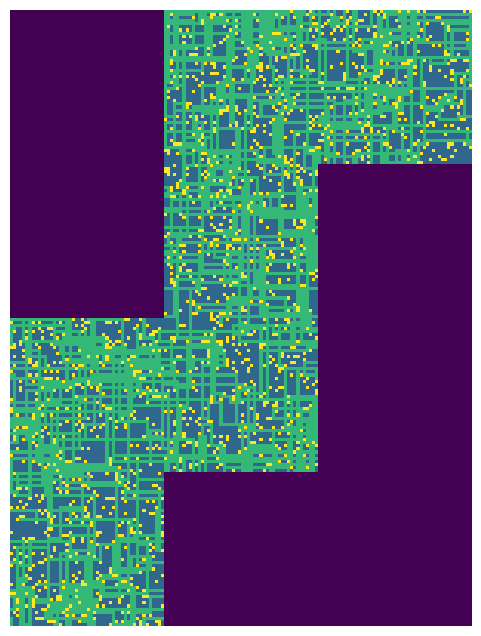

In [5]:
grid, moves = parse22("../AOC2022inputs/input22.txt")

sol1 = part1(grid,moves,verbose=False,markGrid=True)
print("Part 1:",sol1) 

fig = plt.figure(figsize=(6,8))
plt.imshow(grid)
_ = plt.axis('off')

## Part 2

<img src="visualisation/day22_cube1.jpeg" alt="cube 1" width="300"/>

<img src="visualisation/day22_cube2.jpeg" alt="cube 1" width="300"/>

In [8]:
def part2(grid,moves,verbose=False,markGrid=False):
    
    xmax = grid.shape[1]
    ymax = grid.shape[0]
    imov = 0

    P = start(grid)
    
    if markGrid:
        xp,yp = P
        grid[yp][xp] = PATH

    if verbose: print("Starting from",P)
        
    for m in moves:
        if type(m)==int:
            if verbose: print("Move {} in dir {}".format(m,movs[imov]))
            Pnew = P
            advance = True
            for _ in range(m):
                Pnew = ((P[0]+movs[imov][0])%xmax,(P[1]+movs[imov][1])%ymax) 
                Pold = P
                imovold = imov
                xn,yn = Pnew
                if grid[yn][xn]==WALL: # wall, stop moving
                    if verbose: print("Wall in {}".format(Pnew))
                    break
                elif grid[yn][xn]==WRAP: # wrap around cube surface
                    if verbose: print("Wrapping on cube surface...")
                    # Implementing cube surface as in full input, won't work for example!
                    # Considering wrapping at map adges...
                    # SQUARE (1)
                    # top of (1) goes into left of (6)
                    if 50<=xn<=99 and yn==199:
                        Pnew = (0,xn+100)
                        imov = RIGHT
                    # left of (1) goes into left of (4) reversed
                    if xn==49 and 0<=yn<=49:
                        Pnew = (0,149-yn)
                        imov = RIGHT
                    # SQUARE (2)
                    # top of (2) goes into bottom of (6)
                    if 100<=xn<=199 and yn==199:
                        Pnew = (xn-100,yn)
                        imov = UP
                    # bottom of (2) goes into right of (3)
                    if 100<=xn<=199 and yn==50:
                        Pnew = (99,xn-50)
                        imov = LEFT
                    # right of (2) goes into right of (5) reversed
                    if xn==0 and 0<=yn<=49:
                        Pnew = (99,149-yn)
                        imov = LEFT
                    # SQUARE (3)
                    # left of (3) goes into top of (4)
                    if xn==49 and 50<=yn<=99:
                        Pnew = (yn+50,100)
                        imov = DOWN
                    # right of (3) goea into bottom of (2)
                    if xn==100 and 50<=yn<=99:
                        Pnew = (yn+50,49)
                        imov = UP
                    # SQUARE (4)
                    # top of (4) goes into left of (3)
                    if 0<=xn<=49 and yn==99:
                        Pnew = (50,xn+50)
                        imov = RIGHT
                    # left of (4) goes into right of (1) reversed
                    if xn==149 and 100<=yn<=149:
                        Pnew = (50,149-yn)
                        imov = RIGHT
                    # SQUARE (5)
                    # right of (5) goes into left of (2) reversed
                    if xn==100 and 100<=yn<=149:
                        Pnew = (149,149-yn)
                        imov = LEFT
                    # bottom of (5) goes into right of (6)
                    if 50<=xn<=99 and yn==150:
                        Pnew = (49,xn+100)
                        imov = LEFT
                    # SQUARE (6)
                    # left of (6) goes into top of (1)
                    if xn==149 and 150<=yn<=199:
                        Pnew = (yn-100,0)
                        imov = DOWN
                    # right of (6) goes into bottom of (5)
                    if xn==50 and 150<=yn<=199:
                        Pnew = (yn-100,149)
                        imov = UP
                    # bottom of (6) goes into top of (2)
                    if 0<=xn<=49 and yn==0:
                        Pnew = (xn+100,0)
                        imov = DOWN
                    
                    xn,yn = Pnew
                    if grid[yn][xn]==WALL: # wall in new wrap position, stop moving
                        if verbose: print("Wall in {}, back to {}".format(Pnew,Pold))
                        P = Pold
                        imov = imovold
                        advance = False
                        break

                if advance:
                    P = Pnew
                else:
                    break
                
                if verbose: print(P)
                if markGrid: grid[yn][xn]=PATH
        else:
            if verbose: print("Turn",m)
            if m=="L":
                imov = (imov-1)%4
            elif m=="R":
                imov = (imov+1)%4
                
    r = P[1]+1 # row
    c = P[0]+1 # column
    f = imov # facing
    # sum of 1000 times the row, 4 times the column, and the facing.
    password = 1000*r+4*c+f
    return password

In [13]:
grid2, moves = parse22("../AOC2022inputs/input22.txt")

sol2 = part2(grid2,moves,verbose=False,markGrid=False)
print("Part 2:",sol2) # 78291

Part 2: 78291
